In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [34]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [11]:
data = pd.read_csv("data.csv")
data_genres = pd.read_csv("data_by_genres.csv")
data_year = pd.read_csv("data_by_year.csv")

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [28]:
data_year.head(10)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
5,1,1926,0.660817,0.599880,156881.657475,0.211467,0.333093,0.232370,-18.492538,0.483704,109.648033,0.436910,1.422351,9
6,1,1927,0.936179,0.648268,184993.598374,0.264321,0.391328,0.168450,-14.422374,0.113610,114.846524,0.659700,0.801626,7
7,1,1928,0.938617,0.534288,214827.906423,0.207948,0.494835,0.175289,-17.191983,0.159911,106.772262,0.495713,1.525773,1
8,1,1929,0.601427,0.647670,168999.412815,0.241801,0.215204,0.236000,-16.530376,0.490001,110.948357,0.636530,0.340336,7
9,1,1930,0.936715,0.518176,195150.285343,0.333524,0.352206,0.221311,-12.869221,0.119910,109.871194,0.616238,0.926715,2


In [15]:
print(data_genres.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [17]:
print(data_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [21]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ------------ -------------------------- 92.2/282.6 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


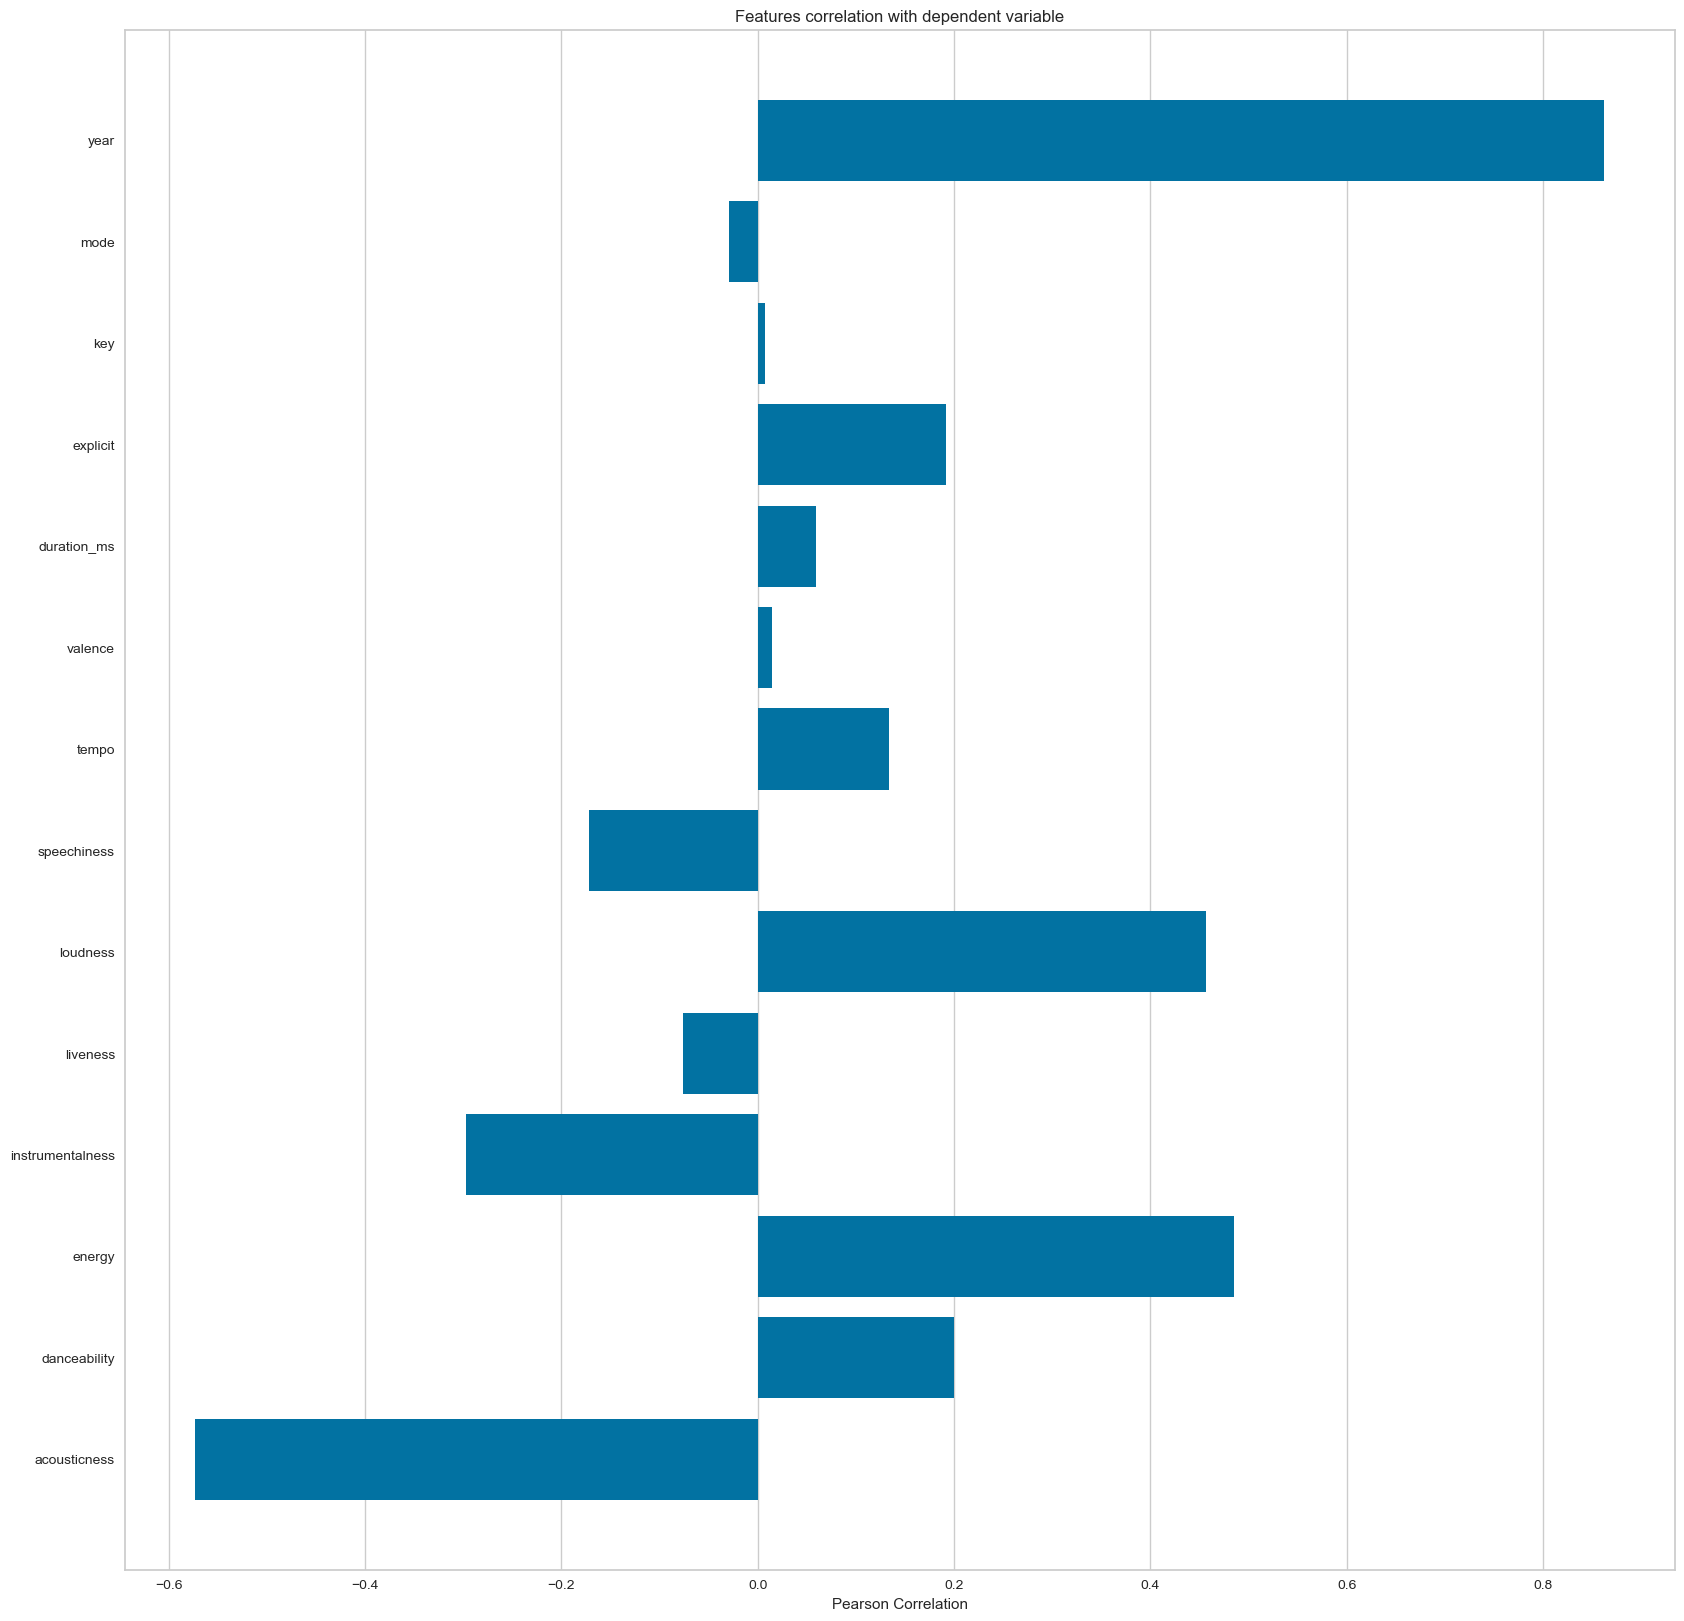

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [23]:
from yellowbrick.target import FeatureCorrelation
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']
X,y = data[feature_names],data["popularity"]
features = np.array(feature_names)
visualizer = FeatureCorrelation(labels = features)
plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X,y)
visualizer.show()

## Data understanding by Visualizing and EDA

## Data Visualization By Deacade

<Axes: xlabel='count', ylabel='decade'>

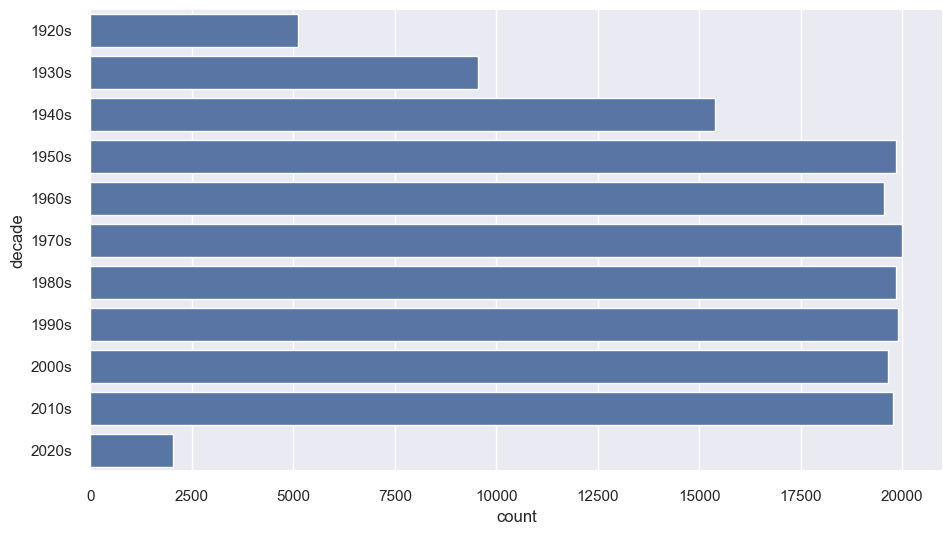

In [36]:
def get_decade(year):
    period_start = int(year/10)*10
    decade = "{}s".format(period_start)
    return decade
data['decade'] = data['year'].apply(get_decade)
sns.set(rc = {"figure.figsize":(11,6)})
sns.countplot(data['decade'])

## Data Visualization By Sound

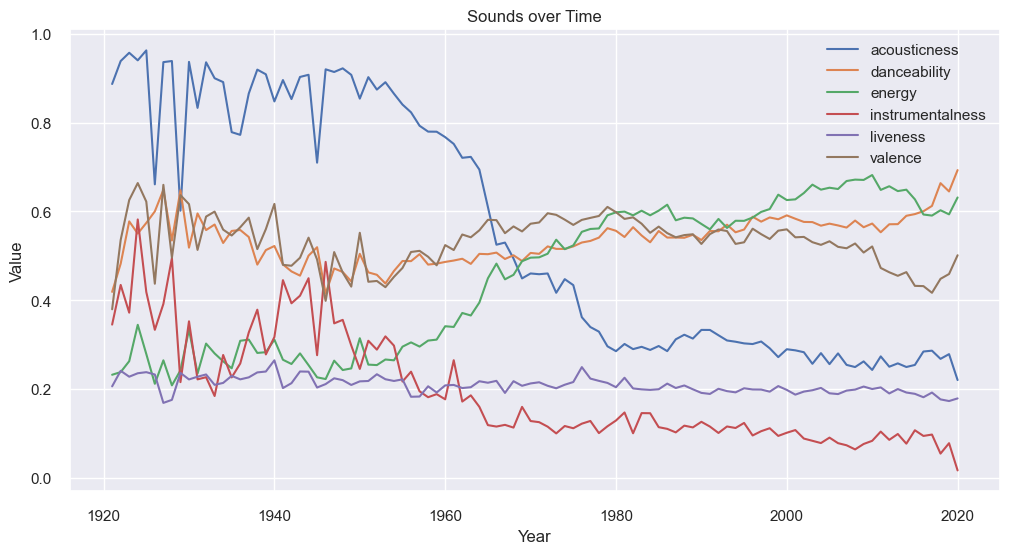

In [52]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize = (12,6))
for feature in sound_features:
    plt.plot(data_year['year'],data_year[feature],label = feature)
plt.legend()
plt.title("Sounds over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

## Data Visualization By Generes

In [59]:
data_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [61]:
top_10_genres = data_genres.nlargest(10, 'popularity')
top_10_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
575,1,circuit,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


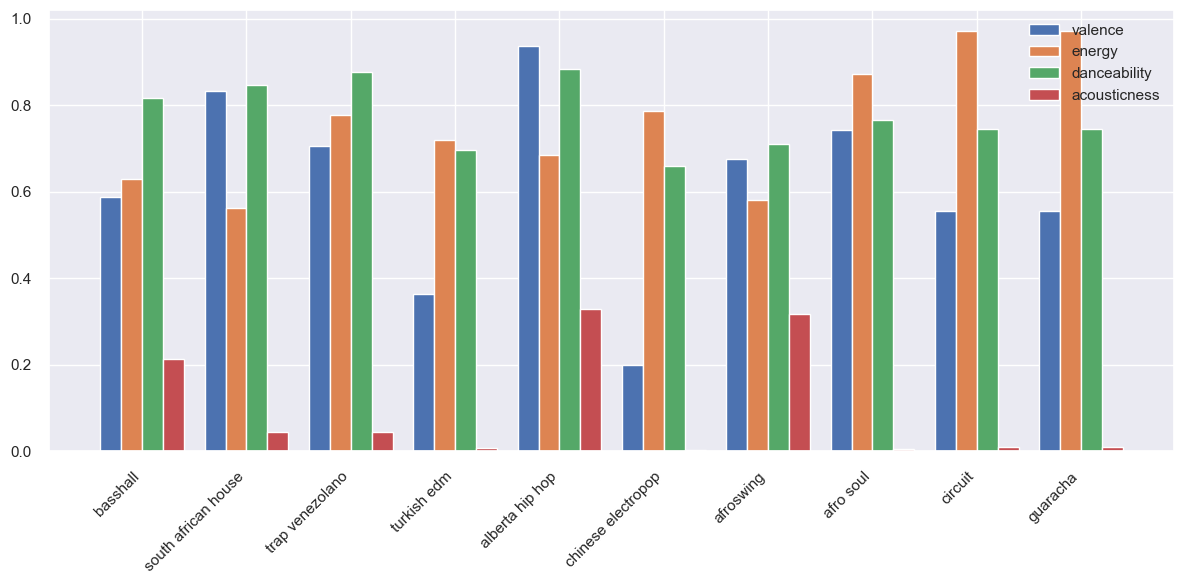

In [65]:
fig = px.bar(top_10_genres, x = 'genres', y = ['valence', 'energy', 'danceability', 'acousticness'], barmode = "group")
plt.figure(figsize = (12,6))
x = np.arange(len(top_10_genres))
width = 0.2
plt.bar(x - width*1.5, top_10_genres['valence'], width, label='valence')
plt.bar(x - width/2, top_10_genres['energy'], width, label='energy')
plt.bar(x + width/2, top_10_genres['danceability'], width, label='danceability')
plt.bar(x + width*1.5, top_10_genres['acousticness'], width, label='acousticness')
plt.xticks(x, top_10_genres['genres'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Clustering Genres with KMeans

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
cluster_pipeline = Pipeline([('scaler',StandardScaler()), ('Kmeans',KMeans(n_clusters = 10))])
X = data_genres.select_dtypes(np.number)
cluster_pipeline.fit(X)
data_genres['cluster'] = cluster_pipeline.predict(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.005s...
[t-SNE] Computed neighbors for 2973 samples in 0.310s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106018
[t-SNE] KL divergence after 1000 iterations: 1.392505


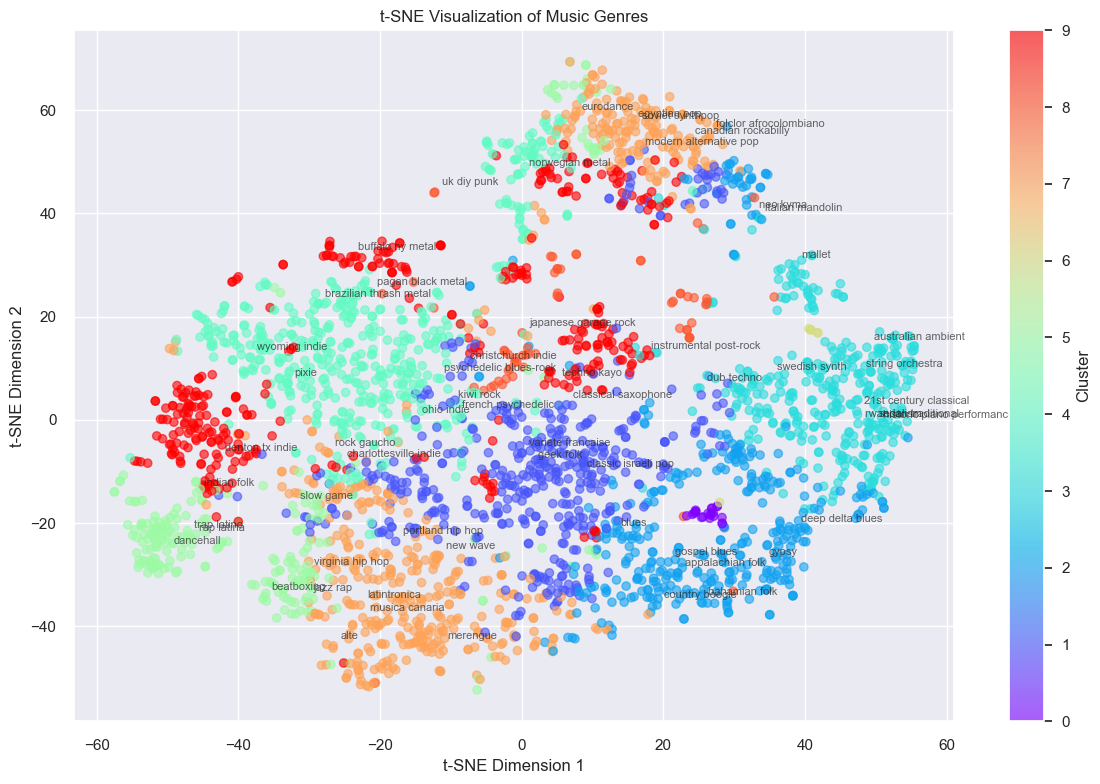

In [88]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])
genre_embedding = tsne_pipeline.fit_transform(X)

# Create the projection DataFrame
projection = pd.DataFrame(
    data=genre_embedding,
    columns=['x', 'y']
)
projection['genres'] = data_genres['genres']
projection['cluster'] = data_genres['cluster']

# Create the matplotlib plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    projection['x'], 
    projection['y'],
    c=projection['cluster'],
    cmap='rainbow',
    alpha=0.6  # Added some transparency
)

# Add a colorbar and labels
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization of Music Genres')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add hover annotations for a few points
for i, genre in enumerate(projection['genres']):
    if i % 50 == 0:  # Only label every 50th point to avoid overcrowding
        plt.annotate(
            genre,
            (projection['x'].iloc[i], projection['y'].iloc[i]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.7
        )

plt.tight_layout()
plt.show()

## Clustering Song with KMeans

In [123]:
song_cluster_pipeline  = Pipeline([('scaler',StandardScaler()),('kmeans',KMeans(n_clusters = 20,
                                                                               verbose = False))],verbose = False)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data["cluster_label"] = song_cluster_labels

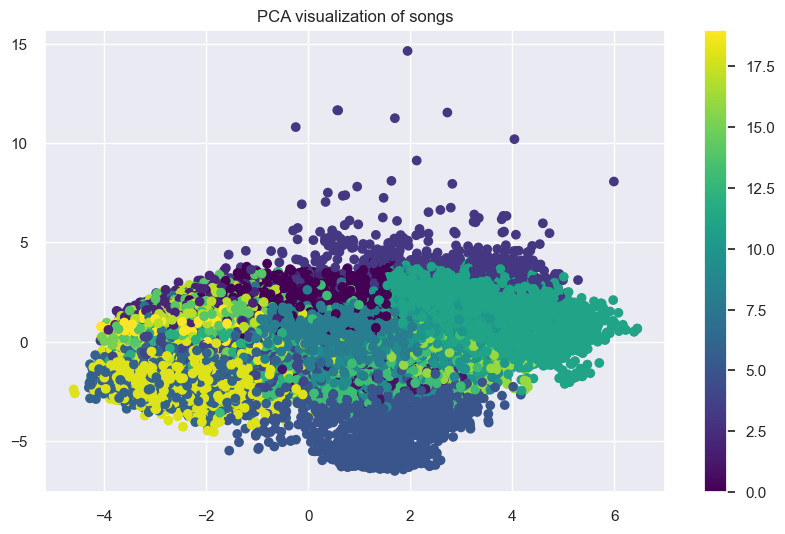

In [124]:
pca_pipeline = Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components = 2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']
plt.figure(figsize=(10, 6))
plt.scatter(projection['x'], projection['y'], c=projection['cluster'], cmap='viridis')
plt.colorbar()
plt.title('PCA visualization of songs')
plt.show()

In [95]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_labels
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s,6
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s,2
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s,6
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s,7
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s,7


In [136]:
def create_spotify_recommendation(song_name, data, number_songs=10):
    """
    Get song recommendations based on audio features and clustering.
    
    Parameters:
        song_name (str): Name of the song to get recommendations for
        data (pandas.DataFrame): The Spotify dataset
        number_songs (int): Number of songs to recommend (default: 5)
        
    Returns:
        pandas.DataFrame: Recommended songs with their features
    """
    # Find the song in our dataset
    try:
        song = data[data['name'].str.lower() == song_name.lower()].iloc[0]
    except IndexError:
        return print(f"'{song_name}' not found in the dataset. Please check the spelling or try another song.")
    
    # Get the cluster label for our song
    cluster_label = song['cluster_label']
    
    # Get all songs from the same cluster
    cluster_songs = data[data['cluster_label'] == cluster_label]
    
    # Drop the input song if it exists in the cluster
    cluster_songs = cluster_songs[cluster_songs['name'] != song_name]
    
    # Calculate the similarity between our song and all other songs in the cluster
    audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
    
    # Calculate distances
    song_features = song[audio_features].astype(float).values.reshape(1, -1)
    cluster_features = cluster_songs[audio_features].astype(float).values
    
    distances = cdist(song_features, cluster_features, metric='euclidean')
    
    # Get the indices of the closest songs
    closest_indices = distances.argsort()[0][:number_songs]
    
    # Get the recommended songs with more information
    recommendations = cluster_songs.iloc[closest_indices][['name', 'artists', 'year', 'popularity'] + audio_features]
    
    return recommendations

def get_recommendations(song_name):
    """
    Wrapper function to print recommendations in a nice format.
    """
    recommendations = create_spotify_recommendation(song_name, data)
    if isinstance(recommendations, pd.DataFrame):
        print(f"\nRecommended songs similar to '{song_name}':\n")
        for idx, row in recommendations.iterrows():
            print(f"🎵 {row['name']}")
            print(f"   Artists: {row['artists']}")
            print(f"   Year: {row['year']}")
            print(f"   Popularity: {row['popularity']}/100")
            print(f"   Audio features: danceability={row['danceability']:.2f}, energy={row['energy']:.2f}, valence={row['valence']:.2f}")
            print()

# Let's see some popular songs in the dataset to try
print("Some popular songs in the dataset:")
popular_songs = data.nlargest(5, 'popularity')[['name', 'artists', 'year', 'popularity']]
for idx, row in popular_songs.iterrows():
    print(f"{row['name']} by {row['artists']} ({row['year']}) - Popularity: {row['popularity']}")

Some popular songs in the dataset:
Dakiti by ['Bad Bunny', 'Jhay Cortez'] (2020) - Popularity: 100
Mood (feat. iann dior) by ['24kGoldn', 'iann dior'] (2020) - Popularity: 99
Dynamite by ['BTS'] (2020) - Popularity: 97
WAP (feat. Megan Thee Stallion) by ['Cardi B', 'Megan Thee Stallion'] (2020) - Popularity: 96
positions by ['Ariana Grande'] (2020) - Popularity: 96


In [148]:
get_recommendations("I Wanna Be Yours")


Recommended songs similar to 'I Wanna Be Yours':

🎵 Stink-Foot
   Artists: ['Frank Zappa']
   Year: 1974
   Popularity: 38/100
   Audio features: danceability=0.37, energy=0.56, valence=0.56

🎵 Werewolf
   Artists: ['CocoRosie']
   Year: 2007
   Popularity: 44/100
   Audio features: danceability=0.51, energy=0.50, valence=0.08

🎵 Extinction
   Artists: ['Killstation']
   Year: 2018
   Popularity: 66/100
   Audio features: danceability=0.55, energy=0.50, valence=0.11

🎵 Last Night
   Artists: ['Little Walter']
   Year: 1993
   Popularity: 38/100
   Audio features: danceability=0.46, energy=0.44, valence=0.45

🎵 La Llorona
   Artists: ['Alanna Ubach', 'Antonio Sol']
   Year: 2017
   Popularity: 57/100
   Audio features: danceability=0.46, energy=0.57, valence=0.37

🎵 Poplar St
   Artists: ['Glass Animals']
   Year: 2016
   Popularity: 60/100
   Audio features: danceability=0.57, energy=0.45, valence=0.26

🎵 Too Young
   Artists: ['Jack Wagner']
   Year: 1985
   Popularity: 45/100
   Aud

In [162]:
import joblib
joblib.dump(cluster_pipeline, 'cluster_pipeline.pkl')

['cluster_pipeline.pkl']